- Need to optimize small-r behavior regulation. Extrapolate was working weird for some reason, so currently the small-r region is filled with the end point value
- Bump in $\xi_\eta$?
- Significant disagreement between Zeus built-in $\xi_\eta$ and and our own

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import zeus21

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=12)

In [2]:
UserParams = zeus21.User_Parameters(precisionboost=3)
CosmoParams_input = zeus21.Cosmo_Parameters_Input(kmax_CLASS=1000., USE_RELATIVE_VELOCITIES=True, ANISO_XI_ETA=True)
ClassyCosmo = zeus21.runclass(CosmoParams_input)
CosmoParams = zeus21.Cosmo_Parameters(UserParams, CosmoParams_input, ClassyCosmo) 
CorrFClass = zeus21.Correlations(UserParams, CosmoParams, ClassyCosmo)

In [3]:
r_list = CorrFClass.rlist_CF
xi_eta = CorrFClass.xiEta_RR_CF # This was in Zeus
xi_eta_aniso = CorrFClass.xiEta_RR_CF_aniso_mnc # This is new

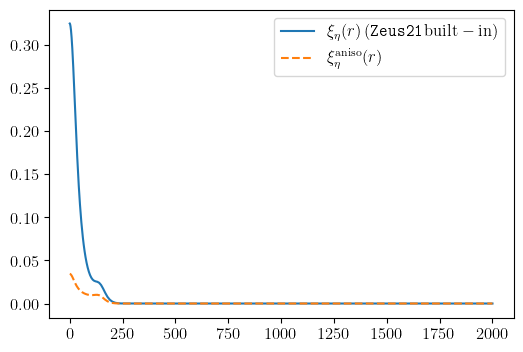

In [4]:
R1choose = 60
R2choose = 60

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(r_list, xi_eta[R1choose, R2choose, :,], label=r'$\xi_{\eta}(r)\,(\texttt{Zeus21}\,\mathrm{built-in})$')
ax.plot(r_list, xi_eta_aniso[R1choose, R2choose, :], label=r'$\xi_\eta^\mathrm{aniso}(r)$', linestyle='--')
ax.legend()

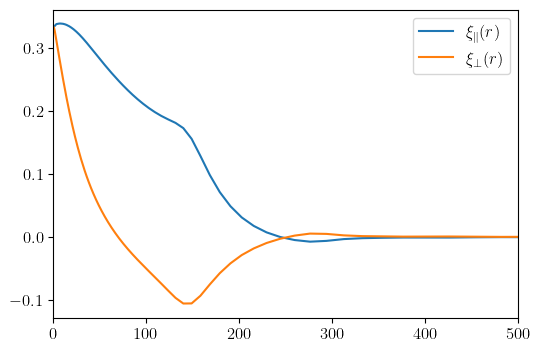

In [8]:
rlist = CorrFClass.rlist_CF
xi_para = CorrFClass.xi_RR_CF_para
xi_perp = CorrFClass.xi_RR_CF_perp
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(rlist, xi_para[0, 0, :], label=r'$\xi_{\parallel}(r)$')
ax.plot(rlist, xi_perp[0, 0, :], label=r'$\xi_{\perp}(r)$')
ax.set_xlim(0, 500)
ax.legend()

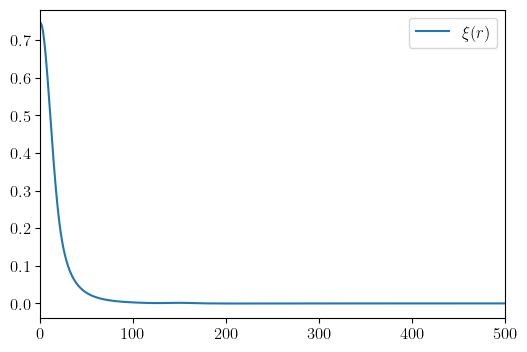

In [6]:
xi_RR_CF = CorrFClass.xi_RR_CF
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(rlist, xi_RR_CF[50, 50, :], label=r'$\xi(r)$')
ax.set_xlim(0, 500)
ax.legend()

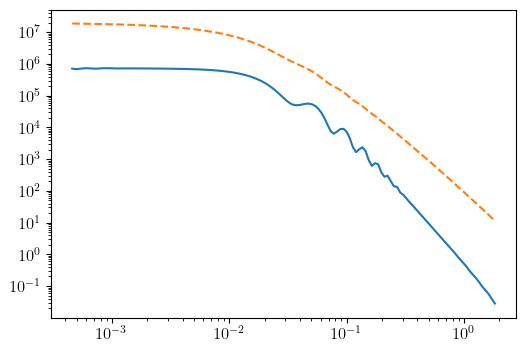

In [7]:
klist = CorrFClass._klistCF
P_eta_zeus = CorrFClass._PkEtaCF

P_zeus = CorrFClass._PklinCF
P_eta_ours = P_zeus / klist

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.loglog(klist, P_eta_zeus, label=r'$P_{\eta}(k)$')
ax.loglog(klist, P_eta_ours, label=r'$P_{\eta,\mathrm{ours}}(k)$', linestyle='--')
# ax.set_xbound(0, 5)